In [27]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [28]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 

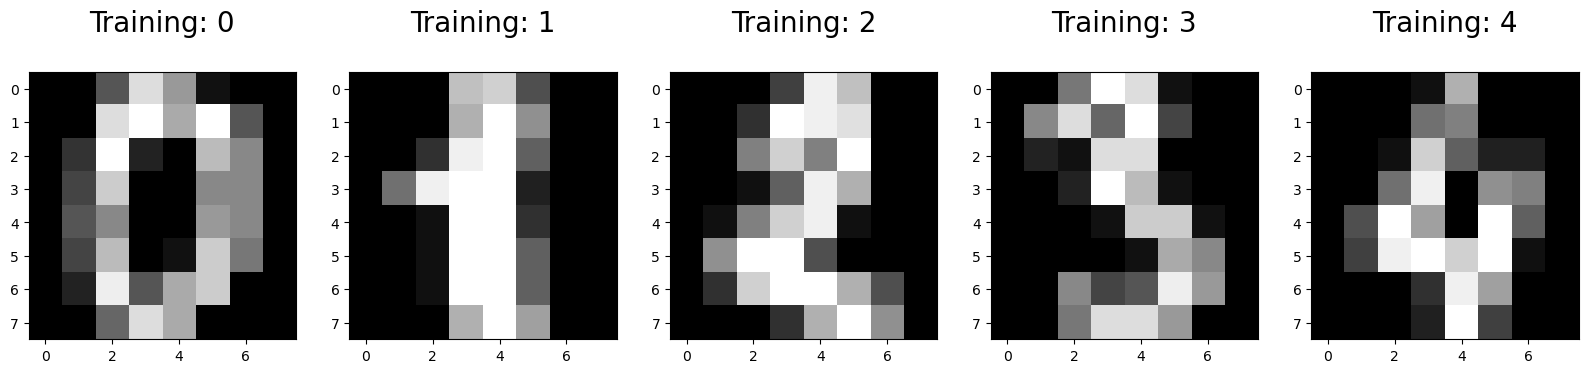

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [30]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [32]:
# 2 batch gradient descent (GD) for Logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def logistic_loss(y_true, probs):
    return -np.mean(np.log(probs[np.arange(len(y_true)), y_true]))

def LogisticRegression_GD(X_train, y_train, learning_rate, epsilon=1e-4, max_iterations=10000):
    num_samples, num_features = X_train.shape
    num_classes = len(np.unique(y_train))
    
    np.random.seed(42)
    W = np.random.randn(num_features, num_classes)
    b = np.zeros((1, num_classes))
    
    loss_history = []
        
    # Initial loss
    logits = np.dot(X_train, W) + b
    probs = softmax(logits)
    prev_loss = logistic_loss(y_train, probs)
    print(f'Initial Loss: {prev_loss}')
    
    # gradient descent
    for i in range(max_iterations):
        # Forward pass
        logits = np.dot(X_train, W) + b
        probs = softmax(logits)
        
        # loss
        loss = logistic_loss(y_train, probs)
        
        if loss_history and np.abs(loss - loss_history[-1]) <= epsilon:
            break
        
        
        # Compute gradients
        one_hot_y = np.eye(num_classes)[y_train] 
        error = probs - one_hot_y
        grad_W = np.dot(X_train.T, error) / num_samples
        grad_b = np.mean(error, axis=0, keepdims=True)
        
        # Update weights and bias
        W -= learning_rate * grad_W
        b -= learning_rate * grad_b
        
        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {loss}')
        
        loss_history.append(loss)
    
    return W, b, loss_history

# Example usage
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([0, 1, 0, 1])
learning_rate = 0.01
epsilon = 1e-4
max_iterations = 10000 # Increased maximum iterations
W, b, loss = LogisticRegression_GD(X_train, y_train, learning_rate, epsilon, max_iterations)


Initial Loss: 0.8892936456638304
Iteration 0, Loss: 0.8892936456638304
Iteration 100, Loss: 0.7148212668572714
Iteration 200, Loss: 0.695629938566433
Iteration 300, Loss: 0.6794142184382397
Iteration 400, Loss: 0.6657247703484379
Iteration 500, Loss: 0.6541682111832922


---------------------------------------
Learning Rate: 0.05
Initial Loss: 0.8892936456638304
Iteration 0, Loss: 0.8892936456638304
Iteration 100, Loss: 0.6540714805839373
Iteration 200, Loss: 0.6180979833830049
Iteration 300, Loss: 0.6020263065642506
Training Accuracy: 0.5
Shape of transposed weight matrix: (2, 2)
---------------------------------------
Learning Rate: 0.005
Initial Loss: 0.8892936456638304
Iteration 0, Loss: 0.8892936456638304
Iteration 100, Loss: 0.7256958924727046
Iteration 200, Loss: 0.7148269972076101
Training Accuracy: 0.5
Shape of transposed weight matrix: (2, 2)
---------------------------------------
Learning Rate: 0.01
Initial Loss: 0.8892936456638304
Iteration 0, Loss: 0.8892936456638304
Iteration 100, Loss: 0.7148212668572714
Iteration 200, Loss: 0.695629938566433
Iteration 300, Loss: 0.6794142184382397
Iteration 400, Loss: 0.6657247703484379
Iteration 500, Loss: 0.6541682111832922
Training Accuracy: 0.5
Shape of transposed weight matrix: (2, 2)


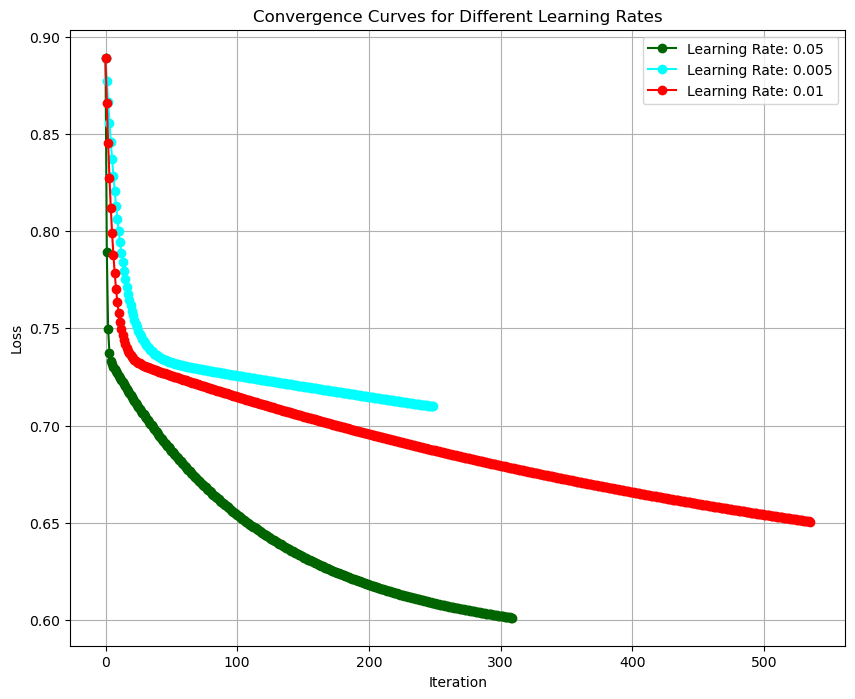

In [33]:
# evaluation of different learning rate
learning_rates = [5.0e-2, 5.0e-3, 1.0e-2]  # Corrected variable name
cl = ['darkgreen', 'cyan', 'red']
models = []

for i, lr in enumerate(learning_rates):
    print('---------------------------------------')
    print('Learning Rate:', lr)
    W, b, loss_history = LogisticRegression_GD(X_train, y_train, lr)
    
    W = W.T
    models.append((W, b, loss_history))

    # Evaluate the model on training and test sets
    train_logits = np.dot(X_train, W) + b
    train_probs = softmax(train_logits)
    train_preds = np.argmax(train_probs, axis=1)
    train_accuracy = np.mean(train_preds == y_train)
    print('Training Accuracy:', train_accuracy)

    # Print shapes of transposed weight matrix and test data
    print("Shape of transposed weight matrix:", W.shape)

# Plot convergence curves
fig, ax = plt.subplots(figsize=(10, 8))
for i, (_, _, loss_history) in enumerate(models):
    plt.plot(loss_history, c=cl[i], ls='-', marker='o', label='Learning Rate: ' + str(learning_rates[i]))

plt.grid()
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Curves for Different Learning Rates')
plt.show()

In [61]:
# 4 stochastic gradient descent (SGD) for Logistic regression

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def logistic_loss(y_true, y_pred):
    batch_loss = -np.mean(np.log(y_pred[np.arange(len(y_true)), y_true]))
    return batch_loss

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps=1.0e-4, max_epoch=500):
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))
    np.random.seed(42)
    W = np.random.randn(num_features, num_classes)
    b = np.zeros((1, num_classes))
    epoch = 0
    loss = []

    prev_loss = float('inf')
    no_improvement_count = 0
    lr_half_count = 0

    while epoch < max_epoch:
        print("Epoch:", epoch)  # Print current epoch
        # Shuffle the data
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Mini-batch SGD
        for i in range(0, num_samples, batch_size):
            print("Batch:", i)  # Print current batch index
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Forward pass
            logits = np.dot(X_batch, W) + b
            probs = softmax(logits)

            # Loss
            batch_loss = logistic_loss(y_batch, probs)
            loss.append(batch_loss)

            # Compute gradients
            one_hot_y = np.eye(num_classes)[y_batch]
            error = probs - one_hot_y
            grad_W = np.dot(X_batch.T, error) / len(X_batch)
            grad_b = np.mean(error, axis=0, keepdims=True)

            # Update weights and bias
            W -= lr * grad_W
            b -= lr * grad_b

        # Learning rate annealing
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                lr_half_count += 1
                print('Reduce learning rate to', lr)
                if lr_half_count >= 10:
                    print('Learning rate reduced 10 times. Early stopping.')
                    break

        # Early stopping
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps:
                no_improvement_count += 1
                if no_improvement_count >= 20:
                    print('No improvement for 20 epochs. Early stopping.')
                    break
            else:
                no_improvement_count = 0

        epoch += 1

    return W, b, loss

---------------------------------------
Batch Size = 10
Learning Rate = 0.01
Epoch: 0
Batch: 0
Epoch: 1
Batch: 0
Epoch: 2
Batch: 0
Epoch: 3
Batch: 0
Epoch: 4
Batch: 0
Epoch: 5
Batch: 0
Epoch: 6
Batch: 0
Epoch: 7
Batch: 0
Epoch: 8
Batch: 0
Epoch: 9
Batch: 0
Epoch: 10
Batch: 0
Epoch: 11
Batch: 0
Epoch: 12
Batch: 0
Epoch: 13
Batch: 0
Epoch: 14
Batch: 0
Epoch: 15
Batch: 0
Epoch: 16
Batch: 0
Epoch: 17
Batch: 0
Epoch: 18
Batch: 0
Epoch: 19
Batch: 0
Epoch: 20
Batch: 0
Epoch: 21
Batch: 0
Epoch: 22
Batch: 0
Epoch: 23
Batch: 0
Epoch: 24
Batch: 0
Epoch: 25
Batch: 0
Epoch: 26
Batch: 0
Epoch: 27
Batch: 0
Epoch: 28
Batch: 0
Epoch: 29
Batch: 0
Epoch: 30
Batch: 0
Epoch: 31
Batch: 0
Epoch: 32
Batch: 0
Epoch: 33
Batch: 0
Epoch: 34
Batch: 0
Epoch: 35
Batch: 0
Epoch: 36
Batch: 0
Epoch: 37
Batch: 0
Epoch: 38
Batch: 0
Epoch: 39
Batch: 0
Epoch: 40
Batch: 0
Epoch: 41
Batch: 0
Epoch: 42
Batch: 0
Epoch: 43
Batch: 0
Epoch: 44
Batch: 0
Epoch: 45
Batch: 0
Epoch: 46
Batch: 0
Epoch: 47
Batch: 0
Epoch: 48
Batch: 0
Ep

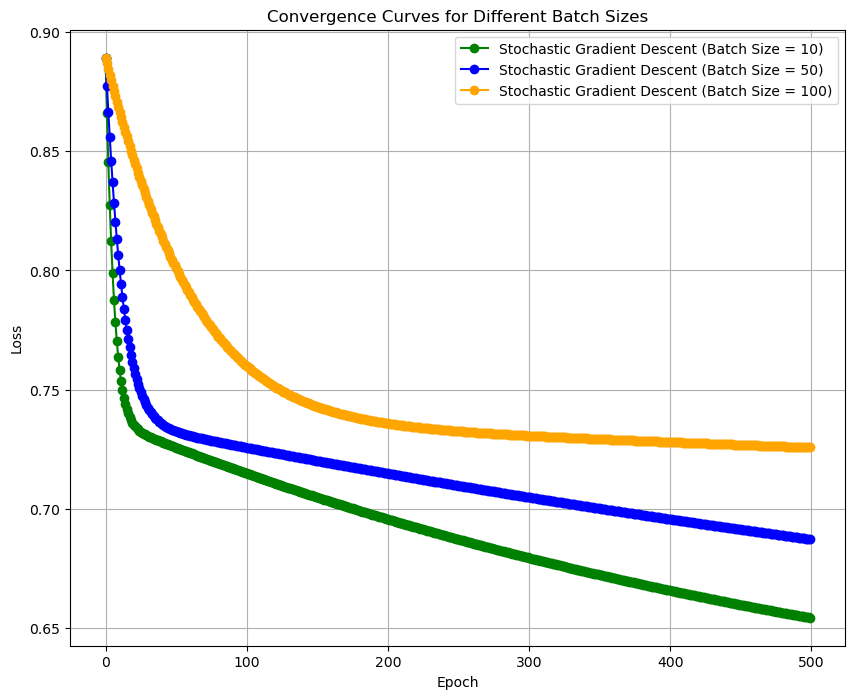

In [60]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [0.01, 0.005, 0.001]

fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    print('---------------------------------------')
    print('Batch Size =', bs[i])
    print('Learning Rate =', lr[i])
    
    # Training the model using LogisticRegression_SGD function
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta=2.0e-1, eps=1.0e-4, max_epoch=500)

    # Print training and test precision (to be implemented)
    # Calculate training and test precision here
    
    # Plot the loss curve
    plt.plot(loss_SGD, c=cl[i], ls='-', marker='o', label='Stochastic Gradient Descent (Batch Size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Convergence Curves for Different Batch Sizes')
plt.show()